<a href="https://colab.research.google.com/github/Banafshehkh/Natural-Language-Processing/blob/main/Classification_dataModelingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Banafsheh Khazali
# Date: March 13, 2023

This Assignment will evaluate your skills in topic modeling and classification. Include in your
submission the code used to generate answers as a Jupyter Notebook or Python program file
as well as any files generated. Make sure it is clear what code answers each question.
This Assignment is meant to be completed individually. You may discuss the questions at a high
level with other students but the final work submitted must be your own. Please reference any
external resources you use to complete this Assignment using ACM referencing format.

# **Exercise 1**

##**A**

Use the 20 Newsgroup dataset (from sklearn.datasets import fetch_20newsgroups) and the
LDA (Latent Dirichlet Allocation) topic modeling algorithm to identify the most common
topics in the dataset. Explain any preprocessing steps applied (and why)

Preprocessing Steps:

Remove stop words:  I  use NLTK library's built-in stop words list to remove them.

Remove words with non alphabetic characters, preposition words(IN)

Lemmatization: I use the NLTK library's WordNetLemmatizer for this purpose.

In [ ]:

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(newsgroups)

# Define the preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    # Remove stop words and words with fewer than 3 characters
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Combine the words back into a string
    text = ' '.join(words)
    
    return text

# Preprocess the text data
preprocessed_data = [preprocess_text(text) for text in newsgroups.data]

# Create a document-term matrix using the CountVectorizer
vectorizer = CountVectorizer(max_features=1000, max_df=0.5, min_df=2)
dtm = vectorizer.fit_transform(preprocessed_data)

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(dtm)

print(lda_model)
# Print the top 10 words for each topic
for idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % idx)
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


LatentDirichletAllocation(random_state=42)
Topic #0:
dont would one people think know get like time thing

Topic #1:
file window program use image system version software get problem

Topic #2:
key chip government use system encryption phone would law clipper

Topic #3:
game year team player play last one first would time

Topic #4:
university 1993 information research may study year new also state

Topic #5:
thanks please anyone know email would book price one like

Topic #6:
god one would people say christian jesus believe think word

Topic #7:
drive space system would one power problem disk use speed

Topic #8:
maxaxaxaxaxaxaxaxaxaxaxaxaxaxax list mail address internet email send posting car anonymous

Topic #9:
armenian people israel state jew war government muslim right one



The reason that I used preprocessing is that we are using the 20 Newsgroup dataset, which consists of emails from 20 different newsgroups or discussion forums. Each email is a text document that may contain noise, irrelevant words, and stop words that do not add any meaning to the document. 

In [ ]:

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint

nltk.download('popular')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
print(newsgroups)

# Define the preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  tokens = word_tokenize(text)
  tagged = pos_tag(tokens)
  words = [token.lower() for token, pos in tagged if token.isalpha() and pos != "IN" and token.lower() not in stop_words]
  pre_processed = [lemmatizer.lemmatize(word) for word in words]
  return pre_processed
    



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_dat

In [ ]:
news = list()
for i in range(len(newsgroups.data)):
    news.append(preprocess_text(newsgroups['data'][i]))

news

[['sure',
  'bashers',
  'pen',
  'fan',
  'pretty',
  'confused',
  'lack',
  'kind',
  'post',
  'recent',
  'pen',
  'massacre',
  'devil',
  'actually',
  'bit',
  'puzzled',
  'bit',
  'relieved',
  'however',
  'going',
  'put',
  'end',
  'relief',
  'bit',
  'praise',
  'pen',
  'man',
  'killing',
  'devil',
  'worse',
  'thought',
  'jagr',
  'showed',
  'much',
  'better',
  'regular',
  'season',
  'stats',
  'also',
  'lot',
  'fo',
  'fun',
  'watch',
  'playoff',
  'bowman',
  'let',
  'jagr',
  'lot',
  'fun',
  'next',
  'couple',
  'game',
  'pen',
  'going',
  'beat',
  'pulp',
  'jersey',
  'anyway',
  'disappointed',
  'see',
  'islander',
  'lose',
  'final',
  'regular',
  'season',
  'game',
  'pen',
  'rule'],
 ['brother',
  'market',
  'video',
  'card',
  'support',
  'vesa',
  'local',
  'bus',
  'ram',
  'anyone',
  'diamond',
  'stealth',
  'pro',
  'local',
  'bus',
  'orchid',
  'farenheit',
  'ati',
  'graphic',
  'ultra',
  'pro',
  'vlb',
  'card',
  

In [ ]:
#if we want to know what is the corresponding word of a mapped numerical representation, we use id2word  imported from Dictionary/
dictionary = Dictionary(news)
#we will filter words that have been repeatitive in more than 40% of the documents and less than 10 docs
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)
#The document in BOW format.
text = [dictionary.doc2bow(summary) for summary in news]

#choose 20 as the number of topics
model = LdaModel(corpus=text, id2word=dictionary, random_state=1, iterations=400, num_topics=20)
top_topics = list(model.top_topics(text))
pprint(top_topics)

[([(0.016753409, 'people'),
   (0.010037429, 'would'),
   (0.008390539, 'one'),
   (0.0071637672, 'right'),
   (0.0059445323, 'think'),
   (0.0053154803, 'say'),
   (0.0045311074, 'many'),
   (0.00451792, 'make'),
   (0.004252129, 'government'),
   (0.0041422667, 'state'),
   (0.0041045984, 'well'),
   (0.004100799, 'thing'),
   (0.004067938, 'time'),
   (0.0040526697, 'u'),
   (0.003956323, 'even'),
   (0.0038954709, 'year'),
   (0.0037726103, 'know'),
   (0.0036115486, 'way'),
   (0.003238135, 'first'),
   (0.0031190822, 'believe')],
  -1.384785432534667),
 ([(0.0106500555, 'one'),
   (0.008970254, 'car'),
   (0.007892237, 'would'),
   (0.0077237766, 'time'),
   (0.007353624, 'get'),
   (0.0060858163, 'know'),
   (0.0057704006, 'said'),
   (0.0053843767, 'well'),
   (0.00516109, 'go'),
   (0.005126944, 'back'),
   (0.0049767517, 'could'),
   (0.004797101, 'people'),
   (0.0046453075, 'think'),
   (0.004404101, 'bike'),
   (0.0040558605, 'even'),
   (0.0040486795, 'much'),
   (0.00402

In [ ]:
#The number of topics: if -1 - all topics will be in result
model.print_topics(num_topics=-1, num_words=10)

[(0,
  '0.012*"image" + 0.009*"use" + 0.009*"key" + 0.007*"system" + 0.007*"would" + 0.006*"government" + 0.005*"program" + 0.005*"public" + 0.005*"ripem" + 0.005*"data"'),
 (1,
  '0.014*"new" + 0.010*"cover" + 0.010*"black" + 0.009*"copy" + 0.009*"price" + 0.008*"wiring" + 0.007*"one" + 0.007*"book" + 0.007*"condition" + 0.007*"captain"'),
 (2,
  '0.012*"one" + 0.011*"would" + 0.008*"think" + 0.006*"say" + 0.006*"people" + 0.006*"know" + 0.006*"may" + 0.006*"christian" + 0.005*"u" + 0.005*"see"'),
 (3,
  '0.011*"driver" + 0.010*"printer" + 0.010*"system" + 0.009*"use" + 0.009*"font" + 0.008*"card" + 0.007*"memory" + 0.006*"get" + 0.006*"one" + 0.005*"new"'),
 (4,
  '0.063*"p" + 0.054*"r" + 0.051*"g" + 0.050*"q" + 0.047*"max" + 0.046*"n" + 0.039*"w" + 0.038*"b" + 0.038*"c" + 0.034*"h"'),
 (5,
  '0.055*"x" + 0.036*"q" + 0.022*"president" + 0.010*"program" + 0.007*"going" + 0.007*"entry" + 0.006*"think" + 0.006*"c" + 0.006*"white" + 0.005*"job"'),
 (6,
  '0.022*"file" + 0.018*"window" + 

In [ ]:
for ind in range(len(top_topics)):
    print(f'topic number {ind}:\n', ' / '.join([model.show_topics(-1, 10)[ind][1].split('"')[i] for i in range(1,20,2)]))

topic number 0:
 image / use / key / system / would / government / program / public / ripem / data
topic number 1:
 new / cover / black / copy / price / wiring / one / book / condition / captain
topic number 2:
 one / would / think / say / people / know / may / christian / u / see
topic number 3:
 driver / printer / system / use / font / card / memory / get / one / new
topic number 4:
 p / r / g / q / max / n / w / b / c / h
topic number 5:
 x / q / president / program / going / entry / think / c / white / job
topic number 6:
 file / window / system / version / x / user / use / program / available / ftp
topic number 7:
 armenian / gun / greek / turkey / turkish / city / turk / new / university / greece
topic number 8:
 disease / drug / page / research / conference / information / national / south / university / american
topic number 9:
 jew / israel / israeli / arab / state / jewish / would / religion / people / one
topic number 10:
 would / please / know / patient / get / thanks / any

## **B**

 Coherence scores are one way to decide on the number of topics to consider from your
topic model. Use CoherenceModel and get_coherence() to obtain coherence values from LDA.
Plot the number of topics vs coherence scores using matplotlib. Did LDA perform well in
identifying topics? From coherence, how many relevant topics are there in the dataset?

The coherence score is: -2.3219756634691384


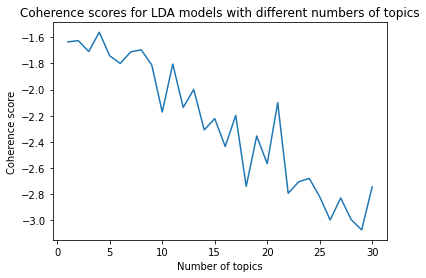

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

#coherence score using a CoherenceModel class
coherence_model = CoherenceModel(model=model, corpus=text, coherence='u_mass')
coherence = coherence_model.get_coherence()
print("The coherence score is:", coherence)

import matplotlib.pyplot as plt

# the range of number of topics
min_topics = 1
max_topics = 30


coherence_scores = list()
num_topics_list = list()

# Loop through models with different numbers of topics and calculate the coherence score corresponding each of them
for num_topics in range(min_topics, max_topics+1):
    
    lda_model = LdaModel(corpus=text, id2word=dictionary, num_topics=num_topics)
    
    # Calculate the coherence score for each model
    coherence_model = CoherenceModel(model=lda_model, corpus=text, dictionary=dictionary, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    
    coherence_scores.append(coherence_score)
    num_topics_list.append(num_topics)

# Plot the coherence scores vs number of topics
plt.plot(num_topics_list, coherence_scores)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.title("Coherence scores for LDA models with different numbers of topics")
plt.show()

The coherence scores measure how well the topics are separated and how semantically interpretable they are. Generally, higher coherence scores indicate better topic models.

From the plot, we can see that the coherence score decreases as the number of topics increases. The optimal number of topics seems to be around 10, as that is where the coherence score is highest.

Based on this coherence analysis, it appears that LDA performed good in identifying relevant topics in the dataset. to evaluate the real performance we can randomly shuffle the words and compute the coherence score and find the lowest value.

 There seem to be around 11 relevant topics in the dataset.

## **C**

How are the documents distributed among the topics you selected as relevant based on
coherence?

In [ ]:
model.top_topics(text)[:10]

[([(0.016753409, 'people'),
   (0.010037429, 'would'),
   (0.008390539, 'one'),
   (0.0071637672, 'right'),
   (0.0059445323, 'think'),
   (0.0053154803, 'say'),
   (0.0045311074, 'many'),
   (0.00451792, 'make'),
   (0.004252129, 'government'),
   (0.0041422667, 'state'),
   (0.0041045984, 'well'),
   (0.004100799, 'thing'),
   (0.004067938, 'time'),
   (0.0040526697, 'u'),
   (0.003956323, 'even'),
   (0.0038954709, 'year'),
   (0.0037726103, 'know'),
   (0.0036115486, 'way'),
   (0.003238135, 'first'),
   (0.0031190822, 'believe')],
  -1.384785432534667),
 ([(0.0106500555, 'one'),
   (0.008970254, 'car'),
   (0.007892237, 'would'),
   (0.0077237766, 'time'),
   (0.007353624, 'get'),
   (0.0060858163, 'know'),
   (0.0057704006, 'said'),
   (0.0053843767, 'well'),
   (0.00516109, 'go'),
   (0.005126944, 'back'),
   (0.0049767517, 'could'),
   (0.004797101, 'people'),
   (0.0046453075, 'think'),
   (0.004404101, 'bike'),
   (0.0040558605, 'even'),
   (0.0040486795, 'much'),
   (0.00402

to find the relevant topics, I searched between the top 10 topics. 

LDA employs probabilities to evaluate the relevance of topics based on each word in the document and in the topic. By using these probabilities, it estimates the most appropriate topic. The distribution of documents across topics can be portrayed as a matrix, where each row indicates a document, each column represents a topic, and the matrix elements signify the likelihood that the document corresponds to the particular topic.

# **Exercise 2**


Assume you have been given a dataset of 1000 observations, with 80% of the data labeled as
"positive" and the remaining 20% labeled as "negative". Below is example code that can be used
to generate a dataset for testing purposes.

##**1** 

Explain why stratified data splitting is important in this scenario and how one way it
can be implemented in Python with the generated dataset.

In this scenario, we have an imbalanced dataset, where 80% of the observations belong to one class and only 20% belong to the other. If we randomly split the dataset into training and testing sets, there is a high probability that the testing set may not have enough samples of the minority class, which could lead to a biased evaluation of the model's performance. This could result in the model performing well on the majority class but not on the minority class, which is of particular interest to us.

Stratified data splitting is a technique that ensures the training and testing sets have the same class distribution as the original dataset. In other words, we want to ensure that both the majority and minority classes are represented in both the training and testing sets. This can be achieved by using the train_test_split() function from the sklearn library with the stratify parameter set to the target variable y.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=4, n_redundant=0,
                            n_repeated=0, n_classes=2, class_sep=2, weights=[0.8, 0.2],
                            random_state=1)

# Split data into training and testing sets while ensuring class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In the above code, the data is splitted into 70% training and 30% testing sets while ensuring that the class balance is maintained using the stratify parameter set to the target variable y. This ensures that the model is trained on a balanced dataset and tested on a representative sample of the original dataset.

## **2**

Show one way in Python to balance out the dataset using over- or undersampling.
Prepare the data for simple hold-out validation.

One way to balance out the dataset is to use undersampling or oversampling techniques. Here is an example of how to undersample the majority class using the RandomUnderSampler from the imbalanced-learn package and prepare the data for simple hold-out validation:

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In this example, we first use RandomUnderSampler to randomly remove observations from the majority class until the dataset is balanced. We then split the balanced dataset into training and testing sets using train_test_split from the sklearn package. This will give us two sets of data, one for training our model and one for evaluating its performance. The random_state argument is set to ensure reproducibility.

## **3**

Explain the concept of nested cross-validation and how it can be used to optimize
hyperparameters in a machine learning model. Explain what the risk of using another
cross-validation technique, say k-fold cross-validation when tuning hyperparameters.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#:~:text=Nested%20cross%2Dvalidation%20(CV),its%20(hyper)parameter%20search.

Nested cross-validation is a technique used to evaluate the performance of a machine learning model and tune its hyperparameters. The main purpose of using this technique is to improve the accuracy of the model and prevent the chance of overfitting. It is a type of cross-validation where an inner loop is used to tune the model's hyperparameters and an outer loop is used to evaluate the performance of the model on unseen data. The outer loop is often referred to as the outer fold, while the inner loop is called the inner fold.

The process of nested cross-validation can be described as follows:

1. The dataset is divided into k equally-sized folds.

2. For each outer fold, the data is split into two parts: the training set and the validation set.

3. For each inner fold, the training set is further divided into k-1 folds for training the model and the remaining fold is used for hyperparameter tuning.

4. The model is trained on the training set of the outer fold, with hyperparameters optimized using the inner fold.

5. The performance of the model is evaluated on the validation set of the outer fold.

6. The process is repeated k times, with each outer fold used as the validation set once.

The advantage of nested cross-validation is that it provides a more accurate estimate of the model's performance compared to a simple train-test split or k-fold cross-validation. It also allows for hyperparameter tuning without overfitting to the training set.

If k-fold cross-validation is used for hyperparameter tuning instead of nested cross-validation, there is a risk of overfitting to the training set. This is because the same data is used for both hyperparameter tuning and model evaluation and the model is not generalized and has poor performance on unseen data. The model may perform well on the validation set, but not on new data, resulting in poor generalization performance. Nested cross-validation addresses this issue by using separate data for hyperparameter tuning and model evaluation.

#**Exercise 3**

For this exercise, you will use a dataset from the UCI Data Repository [1] with sentences
from 3 different companies labelled with positive or negative sentiment. It can be downloaded
here.

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences?spm=a2c6h.12873639.0.0.517447a6UVOlJv

In [ ]:
!mkdir dataset

## **A**

Train a Random Forest model to classify positive and negative sentiment. Report Precision,
Recall, and F1 for each category (e.g., Pos and Neg) for your model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# read in data from all files and combine them into a single dataframe
data = pd.concat([pd.read_csv('/content/dataset/amazon_cells_labelled.txt', sep='\t', header=None),
                  pd.read_csv('/content/dataset/imdb_labelled.txt', sep='\t', header=None),
                  pd.read_csv('/content/dataset/yelp_labelled.txt', sep='\t', header=None)],
                  
                 ignore_index=True)

# assign column names to the combined data
data.columns = ['text', 'label']

data

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [ ]:
display(data.shape) # Number of rows (instances) and columns in the dataset
data["label"].value_counts() # Class distribution in the dataset

(2748, 2)

1    1386
0    1362
Name: label, dtype: int64

In [ ]:
import string
import sklearn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in ENGLISH_STOP_WORDS])
    # remove punctuation and numbers
    return doc

In [ ]:
X = data.text # the column text contains textual data to extract features from
y = data.label # this is the column we are learning to predict. 
print(X.shape, y.shape)
type(X)

(2748,) (2748,)


pandas.core.series.Series

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2061,) (2061,)
(687,) (687,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean, max_features=500) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(2061, 500) (687, 500)


In [ ]:
#training
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# # Initialize a decision tree classifier
# clf = DecisionTreeClassifier(max_depth=3)

# # Train the decision tree classifier
# clf.fit(X_resampled, y_resampled)

# # Use the trained classifier to predict the labels of the testing data
# y_pred = clf.predict(X_test_dtm)

# # Evaluate the accuracy of the predictions
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_dtm, y_train)

# make predictions on the test set
y_pred = rfc.predict(X_test_dtm)

# Evaluate the accuracy of the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.727802037845706
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       341
           1       0.73      0.73      0.73       346

    accuracy                           0.73       687
   macro avg       0.73      0.73      0.73       687
weighted avg       0.73      0.73      0.73       687



##**B**

Discuss your results from Part A. How could the addition of an extra class affect the learning
algorithms? Did you need to account for any particular variables/characteristics in the dataset
when training your model? Why or why not? 

Random Forest classifier achieved an accuracy of 0.728 for the provided text files, with Precision, Recall, and F1-score of 0.73 for both positive and negative categories. These results suggest that the classifier performs well and is equally capable of predicting both positive and negative sentiment.

If an extra class were added to the dataset, it could affect the learning algorithms in several ways. For example, the addition of a third class may increase the complexity of the model, making it harder to achieve high accuracy. Also, the inclusion of an extra class may require more data and computational resources to train the model effectively. But on the other hand, including an additional class (such as neutral) would be beneficial because currently, the model only distinguishes between positive and negative labels, which causes confusion when dealing with sentences that are neither highly positive nor highly negative. These neutral sentences can mislead the model since they have the same labels as highly positive or negative samples. Introducing more labels or classes, including neutral, can improve accuracy. 

When training a sentiment analysis model, it is crucial to account for variables and characteristics in the dataset that can impact the model's performance. For example, if we look at the classification notebook that we had in the class we can see that the dataset was imbalanced and we had to do the oversampling. So it is essential to ensure that the dataset is balanced, with an equal number of samples in each class. If the dataset is imbalanced, techniques such as oversampling or undersampling can be used to balance the dataset.

It is also important to apply appropriate pre-processing techniques to the text data, such as removing stop words, stemming or lemmatizing. This can help to improve the quality of the data and make it more suitable for analysis.

Overall, We have to consider the dataset's characteristics, proper preprocessing techniques, and appropriate algorithm selection to improve sentiment analysis model's performance. In this exercise, we have equal samples for both classes, so there was no need to have oversampling/undersampling but we needed to do the preprocessing techniques. 

## **C**

Can 10-fold cross validation be performed with this dataset? Why or why not?

Given that the dataset has 1386 samples for class 1 and 1362 samples for class 0, it is possible to perform 10-fold cross-validation with this dataset. In this case, since there are more than 10 samples per class, it is possible to divide the data into 10 folds while maintaining a reasonable number of samples in each fold. This would involve randomly dividing the data into 10 equal-sized subsets, with roughly equal representation of both classes in each subset. The model would then be trained and tested on each fold, with the results averaged across all folds to obtain an estimate of model performance.

However, it is important to note that the resulting folds may not be evenly balanced between the two classes, which can potentially affect the performance of the model. To avoidthis issue, techniques such as stratified k-fold cross-validation can be used. In stratified k-fold cross-validation, the folds are created in such a way that the proportion of samples in each class is roughly the same in each fold as in the original dataset. This can help ensure that the resulting folds are representative of the data as a whole and can lead to more reliable estimates of the model's performance.

In summary, 10-fold cross-validation can be performed with this dataset, but it is important to be aware of potential imbalances between the classes and use appropriate techniques to ensure that the resulting folds are representative of the data.

#**Exercise 4**

## **A**

Write a Python program to load the ALBERT (A Lite BERT) pre-trained model using Pytorch
and provide a summary of the model architecture, including the number of layers, number of
parameters, and layer types.

In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.6 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn

import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the pre-trained DistilBert model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Check the size of the model
model_size = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("The DistilBERT model has", model_size, "parameters.")

print(f"Number of layers: {model.config.num_hidden_layers}")

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

The DistilBERT model has 66955010 parameters.
Number of layers: 6


In [ ]:
print(model)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

another example with more layers and ore parameters.

In [ ]:
# Load the pre-trained model and tokenizer
model_name = 'albert-base-v2'
model1 = AlbertModel.from_pretrained(model_name)
tokenizer = AlbertTokenizer.from_pretrained(model_name)

# Display a summary of the model architecture
# print("The DistilBERT model has", model_size, "parameters.")
model_size = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("The DistilBERT model has", model_size, "parameters.")
print(f"Number of layers: {model1.config.num_hidden_layers}")
print(model1)



Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.bias', 'predictions.decoder.bias', 'predictions.dense.bias', 'predictions.LayerNorm.weight', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The DistilBERT model has 11683584 parameters.
Number of layers: 12
AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(30000, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
  

## **B**

Explain the concept of "freezing" layers in a neural network, and why it can be useful when
fine-tuning a pre-trained model. Freeze the first 5 layers of the pre-trained model in Part A. 

Freezing layers in a neural network means setting the parameters of those layers as non-trainable, for example the weights and biases of the frozen layers are not updated during backpropagation.

Freezing layers is useful when fine-tuning a pre-trained model because it allows us to reuse the pre-trained weights and biases for the initial layers of the model, which have already learned important low-level features such as edges and shapes, without altering them during the fine-tuning process. By doing so, we can avoid overfitting and speed up the training process.

To freeze the first 5 layers of the pre-trained ALBERT model in Part A, we can simply set the requires_grad attribute of the layers we want to freeze as False:

In [ ]:
### For the first example:
# Freeze all but the last layer
for name, param in model.named_parameters():
    if 'h.6' not in name:  # layer 6 and beyond will not be frozen
        param.requires_grad = False

In [ ]:
### For the second example:
# Freeze all but the last layer
for name, param in model1.named_parameters():
    if 'h.6' not in name:  # layer 6 and beyond will not be frozen
        param.requires_grad = False

I set the requires_grad attribute of all the parameters in the first 5 layers  and the pooler layer to False

## **C**

Explain the steps involved in fine-tuning a pre-trained model for a specific NLP classification
task. How does the process differ from training a model from scratch? 

https://www.analyticsvidhya.com/blog/2020/07/transfer-learning-for-nlp-fine-tuning-bert-for-text-classification/

Fine-tuning a pre-trained model for a specific NLP classification task involves the following steps:

Preparing the data: The first step is to prepare the data for the specific classification task. This involves preprocessing the data, tokenizing the text, and encoding the labels.

Loading the pre-trained model: Next, load the pre-trained model and tokenizer that were trained on a large corpus of text data. The pre-trained model should be fine-tuned on the specific NLP classification task.

Freezing the initial layers: Since the initial layers of the pre-trained model are already trained to recognize general patterns in the language, it is usually a good practice to freeze them. This means that these layers are not trained during the fine-tuning process, which saves time and reduces the risk of overfitting.

Adding task-specific layers: Add additional layers to the pre-trained model that are specific to the classification task. For instance, for a sentiment analysis task, add a layer that outputs binary classification.

Fine-tuning the model: Train the model on the specific NLP classification task. During this process, the weights of the additional layers are updated while the weights of the initial layers are kept fixed. The model is fine-tuned for the specific task by minimizing the loss function using backpropagation.

Evaluating the model: Once the model is trained, evaluate its performance on a held-out dataset to determine how well it generalizes to new data.

The process of fine-tuning a pre-trained model differs from training a model from scratch in that a pre-trained model has already learned general patterns from a large corpus of data, while a model trained from scratch starts with random weights. Fine-tuning a pre-trained model is typically faster and requires less data than training a model from scratch. Moreover, a pre-trained model may have already learned important language features that can be beneficial for a specific NLP classification task.



